In [20]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import nltk
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
import collections
import numpy as np
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import datetime
import pickle

In [21]:
df= pd.read_csv('topics_df.csv')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'article', 'date', 'headline', 'id',
       'score', 'snippet', 'source', 'type', 'url', 'word_count', 'topic',
       'year', 'month', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29'],
      dtype='object')

AttributeError: Can only use .dt accessor with datetimelike values

In [33]:
!pip install pandas_datareader


    100% |████████████████████████████████| 112kB 2.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for requests-ftp ... done
  Stored in directory: /Users/bellamerlin/Library/Caches/pip/wheels/2a/98/32/37195e45a3392a73d9f65c488cbea30fe5bad76aaef4d6b020
Successfully built requests-ftp
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
df.groupby('topic').count().index.get_level_values(0)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64', name='topic')

In [24]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

plotly.offline.init_notebook_mode(connected=True)

### topic 1

In [61]:
df['date' ==2010-10-26]

KeyError: False

In [67]:
sub_df = df[['article', 'date','year', 'month', 'headline', 'snippet', 'topic','url']]
sub_df['date']= pd.to_datetime(sub_df['date'], infer_datetime_format=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [68]:
sub_df['month_year'] = sub_df.date.dt.to_period("M")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [73]:
t0 = sub_df[sub_df.topic== 0]
t0_count= t0.groupby(['date']).count()
t0_time = t0.groupby('date')[['snippet', 'url']].apply(list)
t0_time = t0_time.reset_index()
t0_time['Count'] = pd.Series([len(i) for i in t0_time['snippet']])
t0_time.plot(x='date', y='Count', figsize=(16, 5), legend=False,
                  title="topic 2", colormap='bwr', fontsize=12)


AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
t1.

In [49]:
t1 = sub_df[sub_df.topic== 1]


In [52]:
 = t1.date.dt.to_period("M")
per

6079    1999-10
6098    1999-12
12452   2011-03
15285   2015-06
15286   2015-06
15311   2015-07
15317   2015-07
15323   2015-07
15325   2015-07
15329   2015-07
15331   2015-07
15333   2015-07
15334   2015-07
15336   2015-07
15337   2015-07
15339   2015-07
15340   2015-07
15350   2015-07
15352   2015-07
15355   2015-08
15361   2015-08
15365   2015-08
15367   2015-08
15371   2015-08
15375   2015-08
15377   2015-08
15378   2015-08
15380   2015-08
15384   2015-08
15385   2015-08
          ...  
18842   2018-05
18846   2018-05
18847   2018-05
18849   2018-05
18850   2018-05
18851   2018-05
18852   2018-05
18857   2018-05
18858   2018-05
18859   2018-05
18865   2018-05
18871   2018-05
18872   2018-05
18873   2018-05
18876   2018-05
18878   2018-05
18879   2018-05
18886   2018-05
18889   2018-05
18891   2018-05
18897   2018-05
18898   2018-05
18905   2018-05
18912   2018-05
18918   2018-05
18922   2018-05
18933   2018-05
18935   2018-05
18936   2018-05
18940   2018-05
Name: date, Length: 1596

In [57]:
t1_count=t1.groupby(t1.date.dt.to_period("M")).count()
t1_count

,article,date,year,month,headline,snippet,topic
date,,,,,,,
1999-10,1,1,1,1,1,1,1
1999-12,1,1,1,1,1,1,1
2011-03,1,1,1,1,1,1,1
2015-06,2,2,2,2,2,2,2
2015-07,14,14,14,14,14,14,14
2015-08,20,20,20,20,20,20,20
2015-09,10,10,10,10,10,10,10
2015-10,4,4,4,4,4,4,4
2015-11,12,12,12,12,12,12,12


In [66]:
t1_time = t1.groupby('date')[['snippet','url']].apply(list)
t1_time

KeyError: "Columns not found: 'url'"

In [64]:
t1_time = t1_time.reset_index()
t1_time['Count'] = pd.Series([len(i) for i in t1_time['snippet']])
t1_time['Count']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      2
9      1
10     2
11     3
12     1
13     1
14     1
15     1
16     1
17     2
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     2
26     1
27     2
28     1
29     2
      ..
640    2
641    1
642    1
643    1
644    3
645    1
646    1
647    1
648    2
649    3
650    4
651    2
652    1
653    5
654    3
655    1
656    3
657    1
658    4
659    5
660    2
661    2
662    4
663    8
664    7
665    4
666    2
667    3
668    3
669    4
Name: Count, Length: 670, dtype: int64

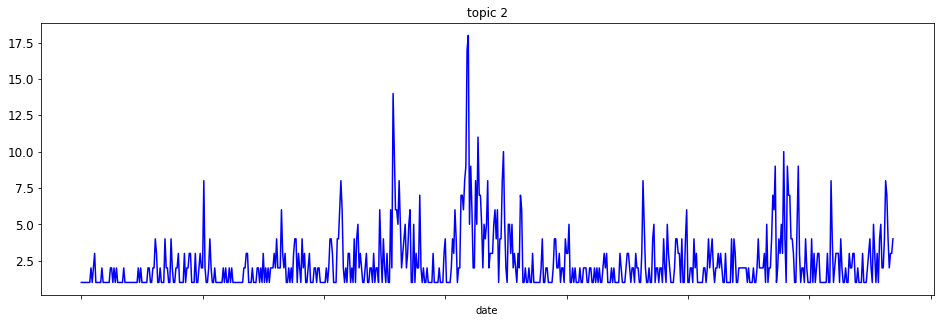

In [31]:
t1_time.plot(x='date', y='Count', figsize=(16, 5), legend=False,
                  title="topic 2", colormap='bwr', fontsize=12)

# xlabel("Time", fontsize=14)
# ylabel("Count - Number of Articles relating to Topic 2", fontsize=14);


In [34]:
import plotly.plotly as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas_datareader as web



t0 = go.Scatter(x=t0_time.date,
                       y=t0_time.Count,
                       name='Topic 1',
                       line=dict(color='#F06A6A'))

trace_low_avg = go.Scatter(x=t0_time.date,
                           y=[t0_time.mean()]*len(df.index),
                           name='Low Average',
                           visible=False,
                           line=dict(color='#F06A6A', dash='dash'))
t1 = go.Scatter(x=t1_time.date,
                        y=t1_time.Count,
                        name='Topic 2',
                        line=dict(color='#33CFA5'))

trace_high_avg = go.Scatter(x=t1_time.date,
                            y=[t1_time.mean()]*len(t1_time.date),
                            name='High Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

data = [t0,trace_low_avg, t1, trace_high_avg ]

# high_annotations=[dict(x='2016-03-01',
#                        y=t1_time.mean(),
#                        xref='x', yref='y',
#                        text='High Average:<br>'+str(t1_time.mean()),
#                        ax=0, ay=-40),
#                   dict(x=t1_time.idxmax(),
#                        y=t1_time.max(),
#                        xref='x', yref='y',
#                        text='High Max:<br>'+str(df.High.max()),
#                        ax=0, ay=-40)]
# low_annotations=[dict(x='2015-05-01',
#                       y=df.Low.mean(),
#                       xref='x', yref='y',
#                       text='Low Average:<br>'+str(df.Low.mean()),
#                       ax=0, ay=40),
#                  dict(x=df.High.idxmin(),
#                       y=df.Low.min(),
#                       xref='x', yref='y',
#                       text='Low Min:<br>'+str(df.Low.min()),
#                       ax=0, ay=40)]
# 
# updatemenus = list([
#     dict(active=-1,
#          buttons=list([   
#             dict(label = 'topic 2',
#                  method = 'update',
#                  args = [{'visible': [True, True, False, False]},
#                          {'title': 'Yahoo High',
#                           'annotations': high_annotations}]),
#             dict(label = 'Low',
#                  method = 'update',
#                  args = [{'visible': [False, False, True, True]},
#                          {'title': 'Yahoo Low',
#                           'annotations': low_annotations}]),
#             dict(label = 'Both',
#                  method = 'update',
#                  args = [{'visible': [True, True, True, True]},
#                          {'title': 'Yahoo',
#                           'annotations': high_annotations+low_annotations}]),
#             dict(label = 'Reset',
#                  method = 'update',
#                  args = [{'visible': [True, False, True, False]},
#                          {'title': 'Yahoo',
#                           'annotations': []}])
#         ]),
#     )
# ])

layout = dict( showlegend=True)

fig = dict(data=data, layout=layout)
iplot(fig, filename='update_dropdown')

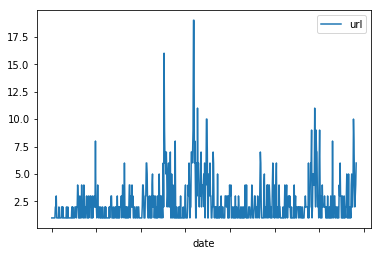

In [23]:
t1.plot(x=t1.index, y='url')

In [7]:
df['topic']

0         3
1        19
2         3
3         6
4        18
5         6
6        18
7         6
8         5
9        19
10        6
11       10
12       15
13       17
14        4
15        0
16        6
17        4
18       19
19       13
20        6
21        6
22        8
23        4
24       19
25        4
26        7
27       18
28       18
29        7
         ..
18915     2
18916    17
18917     2
18918     1
18919    18
18920    15
18921     2
18922     1
18923     1
18924     8
18925     0
18926    19
18927     1
18928     1
18929     2
18930     2
18931     2
18932     0
18933     1
18934     0
18935     1
18936     1
18937     4
18938     3
18939    10
18940     1
18941     7
18942     5
18943    19
18944    19
Name: topic, Length: 18945, dtype: int64

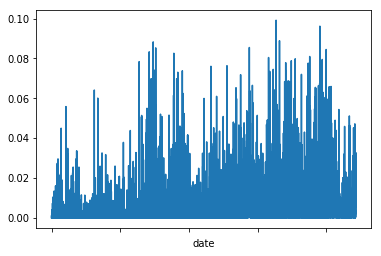

In [5]:
g2= df.groupby('date')['2'].mean()
g2.plot(x='date',y='2')

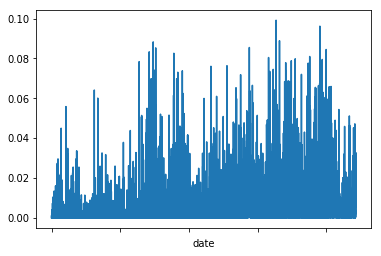

In [10]:
g2.plot()

In [ ]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.to_csv('topics_df.csv')